In [4]:
import pandas as pd
import numpy as np
import lec2_graphs as gfx
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (4, 6) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 100 # resolución gráficos

In [6]:
df = pd.read_csv('datasets/got_battles.csv')

In [7]:
df.columns

Index(['me', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

In [8]:
df.shape

(38, 25)

In [9]:
df['attacker_king'].value_counts()

Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
Name: attacker_king, dtype: int64

In [10]:
df['attacker_king'].value_counts() / len(df)

Joffrey/Tommen Baratheon    0.368421
Robb Stark                  0.263158
Balon/Euron Greyjoy         0.184211
Stannis Baratheon           0.131579
Name: attacker_king, dtype: float64

In [11]:
df['major_death'].value_counts() / len(df)

0.0    0.631579
1.0    0.342105
Name: major_death, dtype: float64

In [12]:
counter = 0
for rowname, rowserie in df.iterrows():
    if rowserie['major_death'] == 1.0 and rowserie['major_capture'] == 1.0:
        counter += 1
print(counter)

6


In [14]:
condicion = (df['major_death'] == 1) & (df['major_capture'] == 1.0)
condicion.value_counts()

False    32
True      6
dtype: int64

In [15]:
counter = 0
for rowname, rowserie in df.iterrows():
    if rowserie['major_death'] == 1.0 or rowserie['major_capture'] == 1.0:
        counter += 1
print(counter)


18


In [16]:
condicion = (df['major_death'] == 1) | (df['major_capture'] == 1.0)
condicion.value_counts()

False    20
True     18
dtype: int64

In [18]:
# iniciemos un contador
muerte_baratheon = 0
# por cada fila en nuestra tabla
for i, r in df.iterrows():
# si la batalla la inicio un Baratheon y hubo una muerte importante
    if (r['attacker_king'] == 'Joffrey/Tommen Baratheon' and r['major_death'] == 1):
# agregar uno a nuestro contador
        muerte_baratheon += 1
print(muerte_baratheon)

5


In [19]:
print("Cantidad de muertes importantes en batallas Baratheon: ", muerte_baratheon)
print("Pr(Muerte | Baratheon): ", muerte_baratheon / len(df))


Cantidad de muertes importantes en batallas Baratheon:  5
Pr(Muerte | Baratheon):  0.13157894736842105


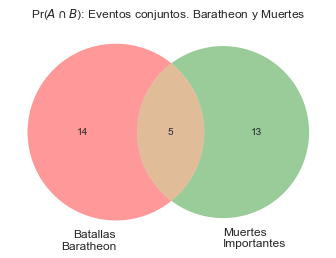

In [20]:
gfx.graph_venn()

In [21]:
print("Cantidad de muertes importantes en batallas Baratheon: ", muerte_baratheon)
print("Pr(Muerte | Baratheon): ", muerte_baratheon / len(df))

Cantidad de muertes importantes en batallas Baratheon:  5
Pr(Muerte | Baratheon):  0.13157894736842105


In [22]:
batallas_baratheon = df['attacker_king'].value_counts().get('Joffrey/Tommen Baratheon')
print("Pr(Muerte|Baratheon):", muerte_baratheon / batallas_baratheon)


Pr(Muerte|Baratheon): 0.35714285714285715
